In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("..","datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing =load_housing_data()

In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

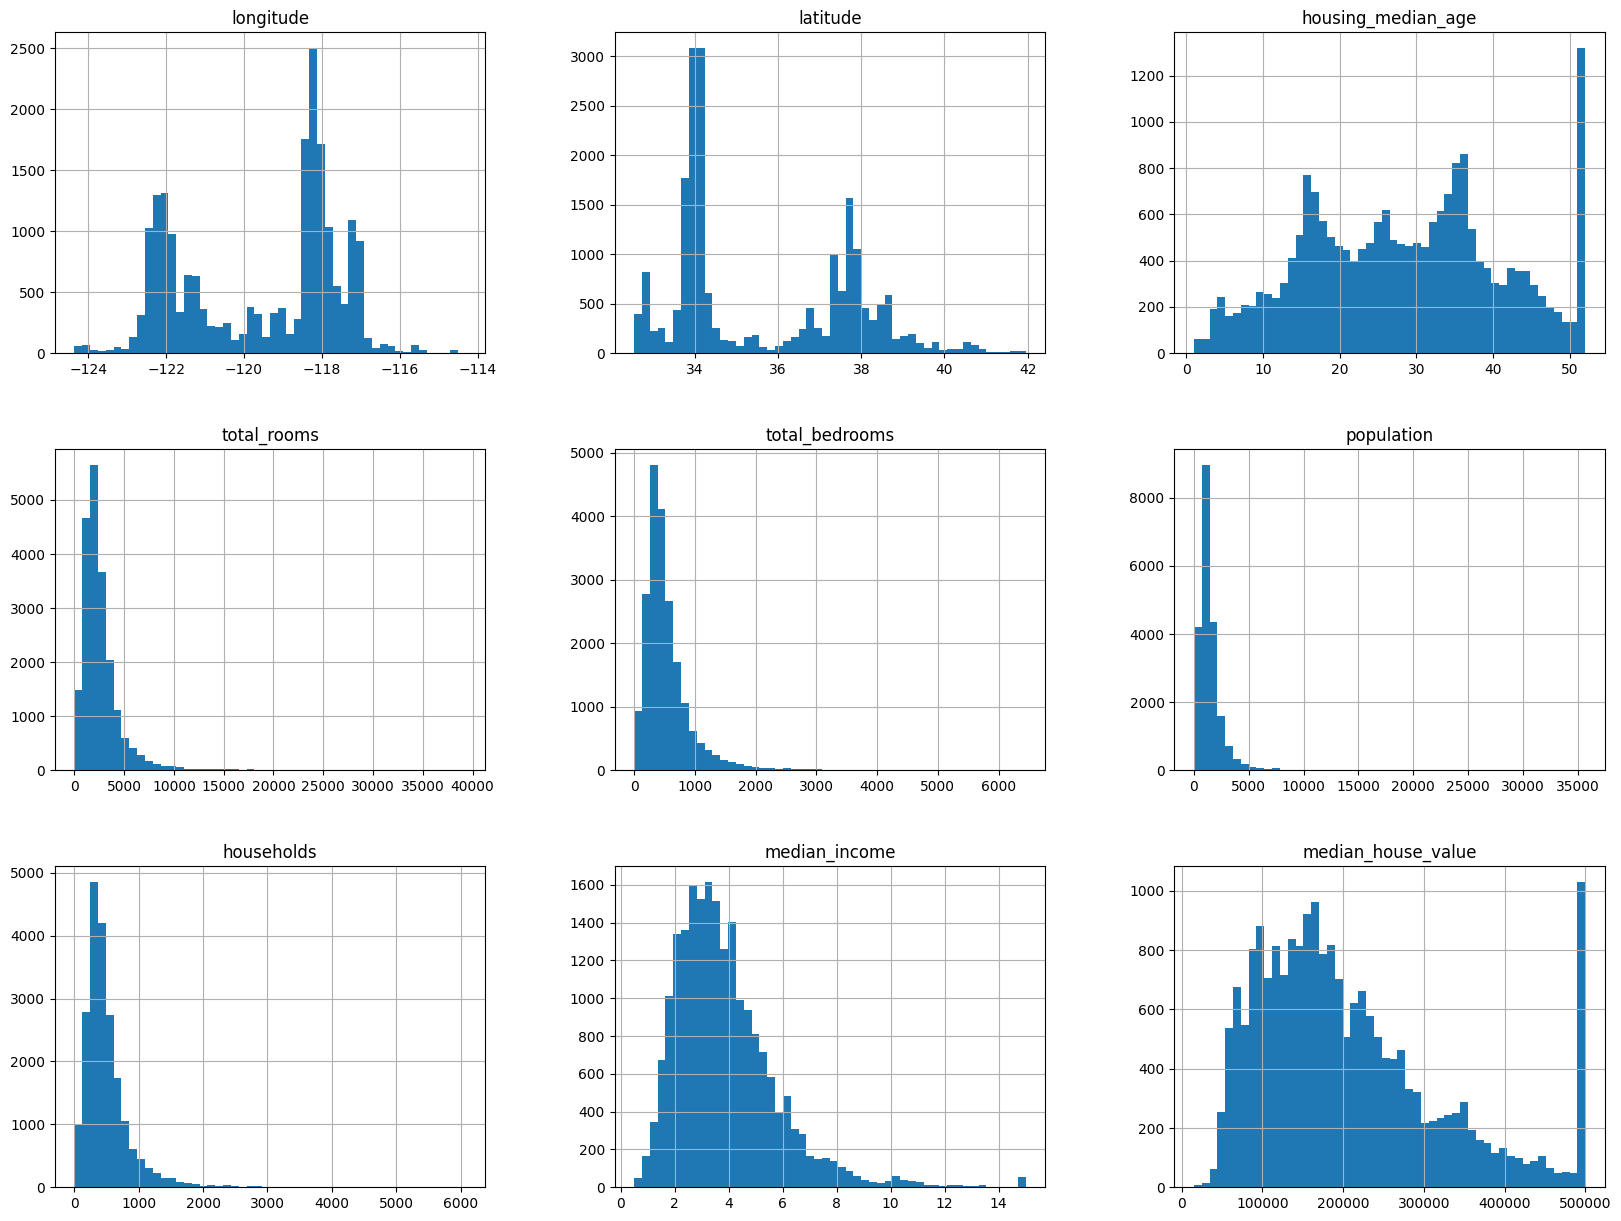

In [6]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing, 0.2)

In [8]:
print(len(train_set))
print(len(test_set))



16512
4128


In [9]:
from zlib import crc32
# hash value.. lower means go inside test_set
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
# adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
test_set


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


In [10]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...,...
20616,20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


<Axes: >

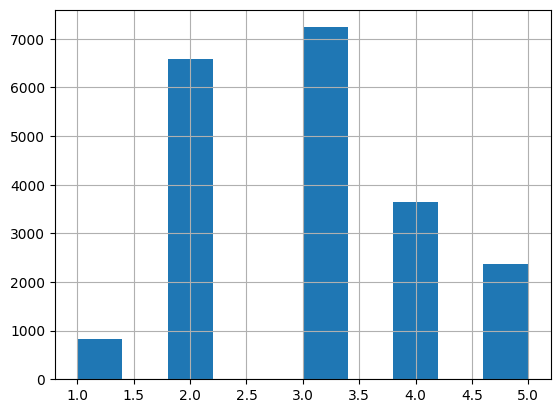

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()
# categorizing income

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
# to get similar ratio data.. here income_cat used
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
# removing income cat

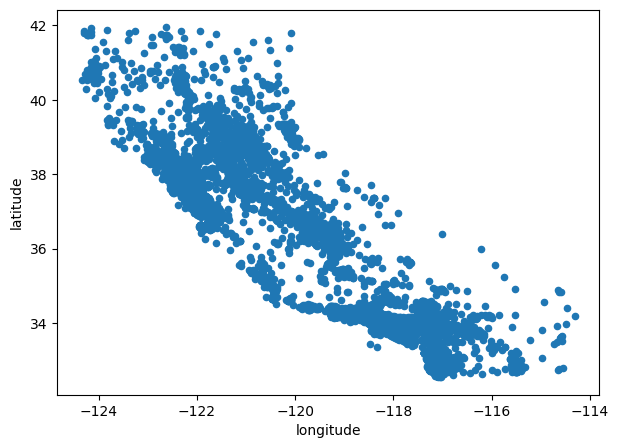

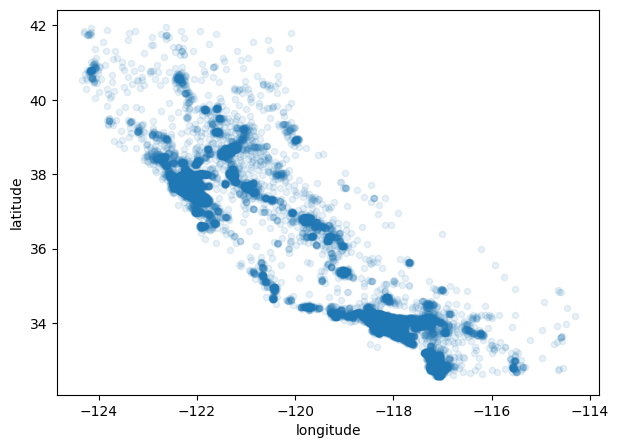

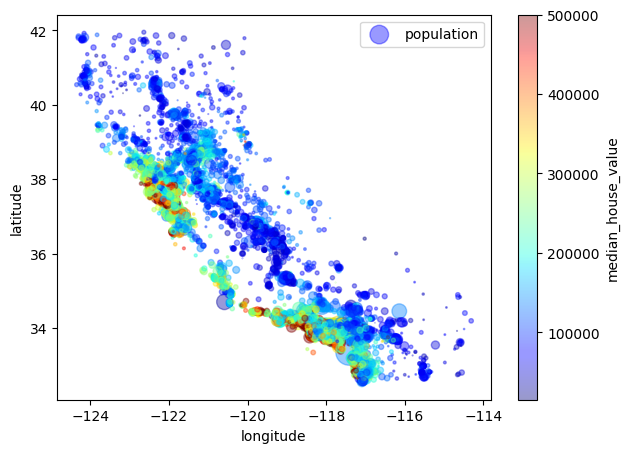

In [15]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(7,5))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(7,5))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(7,5),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()



In [16]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)
#  close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up
# 0-> no relation

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

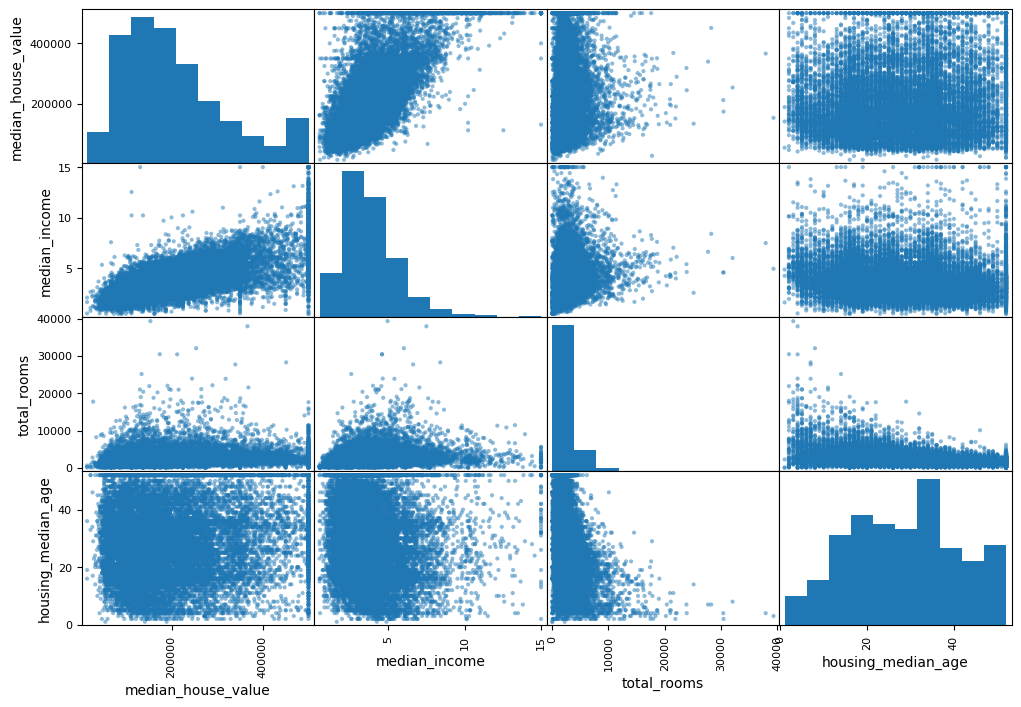

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

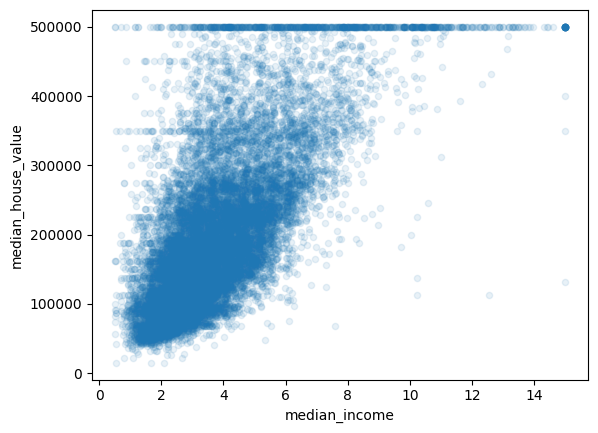

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
# correlation is strong..upward

In [19]:
#feature extraction
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [20]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [21]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
# y

In [22]:
#imputing missing vals
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
print(imputer.statistics_)  #all the median val
print(housing_num.median().values)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [23]:
# Any object that can estimate some parameters based on a dataset is called an estimator
# Some estimators (such as an imputer) can also transform a dataset; these are called transformers.
#some estimators, given a dataset, are capable of making predictions; they are called predictors.
#All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy)


In [24]:
#categ attri convertion
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [25]:
'''from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print( ordinal_encoder.categories_)
housing_cat_encoded[:10]'''
# this is not used..assume that two nearby values are more similar than two distant values

'from sklearn.preprocessing import OrdinalEncoder\nordinal_encoder = OrdinalEncoder()\nhousing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)\nprint( ordinal_encoder.categories_)\nhousing_cat_encoded[:10]'

In [26]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
#housing_cat_1hot ..SciPy sparse matrix
print(cat_encoder.categories_)
housing_cat_1hot.toarray() #numpy array

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [27]:
#col transformer
#create a class and implement three methods: fit() (returning self), transform(), and fit_transform()
#bcs sklearn no inheritance
#TransformerMixin->fit transf n fit_trans free
#BestEstimator.. 2 extra methods->get_params() and set_params()..hyperparameter tuning

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room] #concat of 2 array

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [28]:
#feature scaling
#ml algo don’t perform well when the input numerical attributes have very different scales.
# same scale: min-max scaling(normali)( values are shifted and rescaled so that they end up ranging from 0 to 1)
#and standardization(subtracts the mean value n divides by the standard deviation so that the resulting distribution has unit variance)
#only for train data

In [29]:
#Pipeline class to help with such sequences of transformations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr
#last estimator must be transformer(fit_trans)
#The pipeline exposes the same methods as the final estimator.


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [30]:
#handle num and cat data simul
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])
#constructor requires a list of tuples, where each tuple contains a name,22 a transformer, and a list of names (or indices) of columns that the transformer should be applied to
housing_prepared = full_pipeline.fit_transform(housing)
#applies each transformer to the appropriate columns and concatenates the outputs along the second axis
#sparse metrics have lots of zero values, while Dense metrics don't have any
#string "drop" if you want the columns to be dropped, or you can specify "passthrough" if you want the columns to be left untouched..def drop

#alt use FeatureUnion ->apply diff transformers and concat their ops


In [31]:
#train model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [32]:
X_samp = housing.iloc[:5]
y_samp = housing_labels.iloc[:5]
X_sampPrep = full_pipeline.transform(X_samp)
print("Predictions:", lin_reg.predict(X_sampPrep))
print("Labels:", list(y_samp))


Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [33]:
#scoring
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
#underfitting.. so select poerful model
# median_housing_values range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying.

68627.87390018745

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#shows no errors
#bcs-> badly overfit the data

0.0

In [35]:
#use cross validation
#k-fold->rand splits train_Set into k distinct subsets->folds..trains n evaluates k times
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores #scores for all

array([72757.13301722, 71077.83874012, 69381.46126379, 72018.60108277,
       70827.89810268, 76119.39636135, 72334.3498866 , 73184.58216335,
       68244.75303774, 69771.86394921])

In [36]:
#cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std()) #how precise this estimate is

display_scores(tree_rmse_scores)


Scores: [72757.13301722 71077.83874012 69381.46126379 72018.60108277
 70827.89810268 76119.39636135 72334.3498866  73184.58216335
 68244.75303774 69771.86394921]
Mean: 71571.78776048163
Standard deviation: 2130.0659540020406


In [37]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
#Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


In [38]:
#RandomForestRegressor
# training many Decision Trees on random subsets of the features, then averaging out their predictions
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18591.98103660384

In [39]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
forest_rmse_scores
# score on the training set is still much lower than on the validation sets
#model->overfitting

Scores: [51529.55323187 48921.01028642 47067.42516029 52269.45246287
 47310.44060718 52189.28068669 52503.35788341 49665.03597995
 48522.61202826 54143.17644939]
Mean: 50412.13447763335
Standard deviation: 2308.893259462518


array([51529.55323187, 48921.01028642, 47067.42516029, 52269.45246287,
       47310.44060718, 52189.28068669, 52503.35788341, 49665.03597995,
       48522.61202826, 54143.17644939])

In [40]:
#saving models
import joblib #more efficient at serializing large NumPy arrays
joblib.dump(forest_reg, "forest_model.pkl")
# and later...
forest_model = joblib.load("forest_model.pkl")

In [41]:
#grid search
#to find great comination of hyperparameter vals
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)
#explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values
#5 fold->5 times trained

grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [42]:
print(grid_search.best_estimator_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


RandomForestRegressor(max_features=6, n_estimators=30)
63869.82634381268 {'max_features': 2, 'n_estimators': 3}
55428.261838742525 {'max_features': 2, 'n_estimators': 10}
52535.77697247325 {'max_features': 2, 'n_estimators': 30}
60269.386655912764 {'max_features': 4, 'n_estimators': 3}
52637.244083941965 {'max_features': 4, 'n_estimators': 10}
50200.25199543486 {'max_features': 4, 'n_estimators': 30}
58758.30260103759 {'max_features': 6, 'n_estimators': 3}
51919.70327037644 {'max_features': 6, 'n_estimators': 10}
49884.522735555365 {'max_features': 6, 'n_estimators': 30}
59015.10833332048 {'max_features': 8, 'n_estimators': 3}
52117.58601616692 {'max_features': 8, 'n_estimators': 10}
50001.938779124976 {'max_features': 8, 'n_estimators': 30}
62570.42856427483 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54524.5881813838 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58891.4690909074 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52632.68141235151 

In [64]:
grid_esti = grid_search.best_estimator_
grid_scores = cross_val_score(grid_esti, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
grid_rmse_scores = np.sqrt(-grid_scores)
display_scores(grid_rmse_scores)

Scores: [72670.59497997 66371.92690589 66710.94026013 70614.63101217
 67326.12937176 74060.64938223 76796.55060038 70166.94654989
 67771.04858789 71095.17366625]
Mean: 70358.45913165528
Standard deviation: 3259.337451061356


In [44]:
#Randomized Search
#hyperpara search space is huge

#feature imp
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[7.27951091e-02 6.77044193e-02 4.62247313e-02 1.65745200e-02
 1.71225346e-02 1.82310302e-02 1.67071426e-02 3.28359013e-01
 4.95562858e-02 1.07575081e-01 9.14255753e-02 6.90976479e-03
 1.53143527e-01 6.48331369e-05 3.39495947e-03 4.21147356e-03]


[(0.3283590127740323, 'median_income'),
 (0.1531435270338526, 'INLAND'),
 (0.10757508103175738, 'pop_per_hhold'),
 (0.09142557534802227, 'bedrooms_per_room'),
 (0.07279510910657691, 'longitude'),
 (0.06770441931016112, 'latitude'),
 (0.04955628577215876, 'rooms_per_hhold'),
 (0.046224731304699396, 'housing_median_age'),
 (0.018231030205885748, 'population'),
 (0.017122534575364355, 'total_bedrooms'),
 (0.0167071426321254, 'households'),
 (0.01657451995218635, 'total_rooms'),
 (0.006909764786826286, '<1H OCEAN'),
 (0.004211473560901746, 'NEAR OCEAN'),
 (0.003394959468567849, 'NEAR BAY'),
 (6.48331368816051e-05, 'ISLAND')]

In [45]:
#Evaluate test_set
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


48368.951852850296

In [46]:
#how precise this estimate is
# compute a 95% confidence interval for the generalization error using scipy.stats.t.interval()
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([46399.68523469, 50261.12032982])

# Exercise

#1

In [47]:
#1
from sklearn.svm import SVR
svm = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [3, 2, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

grid_search = GridSearchCV(svm, param_grid, refit = True, verbose = 3, scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[CV 1/5] END C=0.1, gamma=3, kernel=rbf;, score=-14135160649.226 total time=   7.7s
[CV 2/5] END C=0.1, gamma=3, kernel=rbf;, score=-13770768001.823 total time=   6.5s
[CV 3/5] END C=0.1, gamma=3, kernel=rbf;, score=-14194677205.073 total time=   5.8s
[CV 4/5] END C=0.1, gamma=3, kernel=rbf;, score=-14264419716.485 total time=   6.8s
[CV 5/5] END C=0.1, gamma=3, kernel=rbf;, score=-14367653270.436 total time=   6.1s
[CV 1/5] END C=0.1, gamma=3, kernel=linear;, score=-13965427062.692 total time=   3.9s
[CV 2/5] END C=0.1, gamma=3, kernel=linear;, score=-13616417268.058 total time=   3.8s
[CV 3/5] END C=0.1, gamma=3, kernel=linear;, score=-14033042363.464 total time=   3.7s
[CV 4/5] END C=0.1, gamma=3, kernel=linear;, score=-14106667609.914 total time=   3.7s
[CV 5/5] END C=0.1, gamma=3, kernel=linear;, score=-14204193506.759 total time=   3.8s
[CV 1/5] END C=0.1, gamma=2, kernel=rbf;, score=-14134971385.470 total time=   5.5s
[CV 2/5] END C=0.1, gamma=2, kernel=rbf;, score=-13770616200.

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [3, 2, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [48]:
grid_svm = grid_search.predict(X_test_prepared)
print(np.sqrt(-grid_search.best_score_))

svm_grid_model= grid_search.best_estimator_
svm_grid_scores = cross_val_score(svm_grid_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_grid_rmse_scores = np.sqrt(-svm_grid_scores)
display_scores(svm_grid_rmse_scores)


70396.49756751396
Scores: [72670.59497997 66371.92690589 66710.94026013 70614.63101217
 67326.12937176 74060.64938223 76796.55060038 70166.94654989
 67771.04858789 71095.17366625]
Mean: 70358.45913165528
Standard deviation: 3259.337451061356


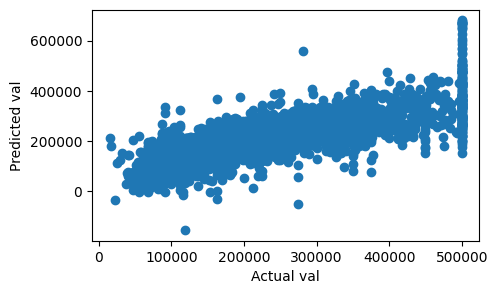

In [49]:
plt.figure(figsize=(5,3))
plt.scatter(y_test, grid_svm)
plt.xlabel("Actual val")
plt.ylabel("Predicted val")
plt.show()

#2

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, expon
import scipy
param_distribs = {
        "C": expon(scale=.1),
        "gamma": expon(scale=.1),
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "epsilon": uniform(loc=0, scale=1)  #unif distri
    }

rand_search = RandomizedSearchCV(svm,
                                 param_distributions=param_distribs,
                                 n_iter=10,
                                 cv=5,
                                 scoring="neg_mean_squared_error",
                                 random_state=42,
                                 verbose = 3
                                 )

rand_search.fit(housing_prepared, housing_labels)
print(rand_search.best_params_)
print(rand_search.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.04692680899768591, epsilon=0.9507143064099162, gamma=0.13167456935454494, kernel=linear;, score=-14052002180.300 total time=   6.6s
[CV 2/5] END C=0.04692680899768591, epsilon=0.9507143064099162, gamma=0.13167456935454494, kernel=linear;, score=-13696311105.740 total time=   6.3s
[CV 3/5] END C=0.04692680899768591, epsilon=0.9507143064099162, gamma=0.13167456935454494, kernel=linear;, score=-14116711003.544 total time=   6.5s
[CV 4/5] END C=0.04692680899768591, epsilon=0.9507143064099162, gamma=0.13167456935454494, kernel=linear;, score=-14189611911.297 total time=   6.7s
[CV 5/5] END C=0.04692680899768591, epsilon=0.9507143064099162, gamma=0.13167456935454494, kernel=linear;, score=-14288822871.166 total time=   6.6s
[CV 1/5] END C=0.09084469696321254, epsilon=0.44583275285359114, gamma=0.010533264473289401, kernel=poly;, score=-14135750069.887 total time=   7.2s
[CV 2/5] END C=0.09084469696321254, epsilon=0

In [51]:
rand_svm = rand_search.predict(X_test_prepared)
print(np.sqrt(-rand_search.best_score_))

svm_rand_model= grid_search.best_estimator_
svm_rand_scores = cross_val_score(svm_rand_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_rand_rmse_scores = np.sqrt(-svm_rand_scores)
display_scores(svm_rand_rmse_scores)

118324.82056895361
Scores: [72670.59497997 66371.92690589 66710.94026013 70614.63101217
 67326.12937176 74060.64938223 76796.55060038 70166.94654989
 67771.04858789 71095.17366625]
Mean: 70358.45913165528
Standard deviation: 3259.337451061356


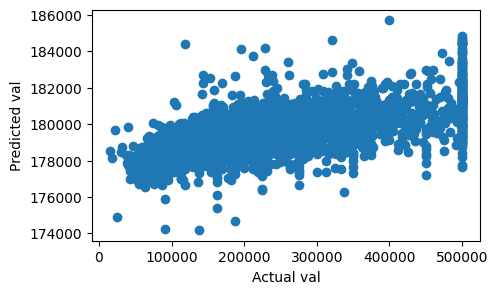

In [52]:
plt.figure(figsize=(5,3))
plt.scatter(y_test, rand_svm)
plt.xlabel("Actual val")
plt.ylabel("Predicted val")
plt.show()

#3

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin
def indexFeatures(arr, k):
    return np.argsort(arr)[-k:]

class BestFeature(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indexFeatures(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]



In [54]:
print(feature_importances)
k=5
print(indexFeatures(feature_importances, k))
sorted(zip(feature_importances, attributes), reverse=True)[:k]


[7.27951091e-02 6.77044193e-02 4.62247313e-02 1.65745200e-02
 1.71225346e-02 1.82310302e-02 1.67071426e-02 3.28359013e-01
 4.95562858e-02 1.07575081e-01 9.14255753e-02 6.90976479e-03
 1.53143527e-01 6.48331369e-05 3.39495947e-03 4.21147356e-03]
[ 0 10  9 12  7]


[(0.3283590127740323, 'median_income'),
 (0.1531435270338526, 'INLAND'),
 (0.10757508103175738, 'pop_per_hhold'),
 (0.09142557534802227, 'bedrooms_per_room'),
 (0.07279510910657691, 'longitude')]

In [55]:
bestFeat_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', BestFeature(feature_importances, k))
])
housing_bestKfeat = bestFeat_pipeline.fit_transform(housing)
print(housing_bestKfeat[0:3])
print(housing_prepared[0:3, indexFeatures(feature_importances, k)])

[[-0.94135046 -0.12112176  0.00622264  1.         -0.8936472 ]
 [ 1.17178212 -0.81086696 -0.04081077  0.          1.292168  ]
 [ 0.26758118 -0.33827252 -0.07537122  1.         -0.52543365]]
[[-0.94135046 -0.12112176  0.00622264  1.         -0.8936472 ]
 [ 1.17178212 -0.81086696 -0.04081077  0.          1.292168  ]
 [ 0.26758118 -0.33827252 -0.07537122  1.         -0.52543365]]


#4

In [56]:
bestParam= rand_search.best_params_
bestParam_pipeline= Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', BestFeature(feature_importances, k)),
    ('svm_reg', SVR()),
])
bestParam_pipeline.named_steps['svm_reg'].set_params(**bestParam)
bestParam_pipeline.fit(housing, housing_labels) #in svr u need to fit it first
y_pred4=bestParam_pipeline.predict((housing.iloc[:4]))
print(np.sqrt(mean_squared_error(housing_labels.iloc[:4], y_pred4)))

93226.01647239765


#5

In [57]:
import warnings
'''from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)'''
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'
    param_grid_prep= [{
        'preparation__num__imputer__strategy' : ['mean', 'median', 'most_frequent'],
        'feature_selection__k': list(range(1, len(feature_importances) + 1))
    }]
    grid_search_prep = GridSearchCV(bestParam_pipeline, param_grid_prep, cv=5, verbose = 3, scoring="neg_mean_squared_error")
    grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[CV 1/5] END feature_selection__k=1, preparation__num__imputer__strategy=mean;, score=-14024960039.141 total time=   6.5s
[CV 2/5] END feature_selection__k=1, preparation__num__imputer__strategy=mean;, score=-13677716867.148 total time=   6.9s
[CV 3/5] END feature_selection__k=1, preparation__num__imputer__strategy=mean;, score=-14090206475.853 total time=   7.0s
[CV 4/5] END feature_selection__k=1, preparation__num__imputer__strategy=mean;, score=-14166147659.751 total time=   7.2s
[CV 5/5] END feature_selection__k=1, preparation__num__imputer__strategy=mean;, score=-14261599421.429 total time=   6.9s
[CV 1/5] END feature_selection__k=1, preparation__num__imputer__strategy=median;, score=-14024960039.141 total time=   6.9s
[CV 2/5] END feature_selection__k=1, preparation__num__imputer__strategy=median;, score=-13677716867.148 total time=   6.6s
[CV 3/5] END feature_selection__k=1, preparation__num__imputer__strategy=median;, score=-14090206475.853 total time=   6.3s
[CV 4/5] END featu

In [65]:
print(grid_search_prep.best_params_)
print(grid_search_prep.best_estimator_)
grid_esti_q5= grid_search_prep.best_estimator_
grid_scores_q5 = cross_val_score(grid_esti_q5, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
grid_rmse_scores_q5 = np.sqrt(-grid_scores_q5)
display_scores(grid_rmse_scores_q5)

{'feature_selection__k': 13, 'preparation__num__imputer__strategy': 'most_frequent'}
Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
       

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CustomAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True, add_rooms_per_household = True, add_population_per_household=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.add_rooms_per_household = add_rooms_per_household
        self.add_population_per_household = add_population_per_household
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        new_attri= X
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            new_attri= np.c_[new_attri, bedrooms_per_room] #concat of 2 array
            print(new_attri)
        if self.add_rooms_per_household:
            rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
            new_attri= np.c_[new_attri, rooms_per_household]

        if self.add_population_per_household:
            population_per_household = X[:, population_ix] / X[:, households_ix]
            new_attri= np.c_[new_attri, population_per_household]
        return new_attri
new_attri = CustomAttributesAdder()
housing_new_attribs = new_attri.transform(housing.values)

[[-121.46 38.52 29.0 ... 2.1736 'INLAND' 0.20578363026077975]
 [-117.23 33.09 7.0 ... 6.3373 'NEAR OCEAN' 0.16071428571428573]
 [-119.04 35.37 44.0 ... 2.875 'INLAND' 0.1915945611866502]
 ...
 [-122.72 38.44 48.0 ... 3.1797 '<1H OCEAN' 0.2347949080622348]
 [-122.7 38.31 14.0 ... 4.1964 '<1H OCEAN' 0.1838351822503962]
 [-122.14 39.97 27.0 ... 3.1319 'INLAND' 0.2057460611677479]]


In [67]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline_new = ColumnTransformer([
        ("num", Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('attribs_adder', CustomAttributesAdder()),
            ('std_scaler', StandardScaler()),]), num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])
housing_prepared_new = full_pipeline_new.fit_transform(housing)
bestParam_pipeline_new= Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', BestFeature(feature_importances, k)),
    ('svm_reg', SVR()),
])
bestParam_pipeline_new.named_steps['svm_reg'].set_params(**bestParam)
bestParam_pipeline_new.fit(housing, housing_labels) #in svr u need to fit it first
y_pred5=bestParam_pipeline_new.predict((housing.iloc[:4]))
print(np.sqrt(mean_squared_error(housing_labels.iloc[:4], y_pred5)))

[[-1.21460000e+02  3.85200000e+01  2.90000000e+01 ...  7.06000000e+02
   2.17360000e+00  2.05783630e-01]
 [-1.17230000e+02  3.30900000e+01  7.00000000e+00 ...  7.68000000e+02
   6.33730000e+00  1.60714286e-01]
 [-1.19040000e+02  3.53700000e+01  4.40000000e+01 ...  3.00000000e+02
   2.87500000e+00  1.91594561e-01]
 ...
 [-1.22720000e+02  3.84400000e+01  4.80000000e+01 ...  1.72000000e+02
   3.17970000e+00  2.34794908e-01]
 [-1.22700000e+02  3.83100000e+01  1.40000000e+01 ...  5.01000000e+02
   4.19640000e+00  1.83835182e-01]
 [-1.22140000e+02  3.99700000e+01  2.70000000e+01 ...  1.97000000e+02
   3.13190000e+00  2.05746061e-01]]


93226.01647239765
